In [115]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris(as_frame=True)
data = iris.data[['sepal length (cm)', 'sepal width (cm)']].rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'})
target = iris.target
data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [2]:
from sklearn.model_selection import train_test_split

X = data[0:100]
y = target[0:100]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

dtype('int32')

In [3]:
features = X.values.tolist()
classes = y.values.tolist()

In [4]:
data = [x + [y] for x, y in zip(features, classes)]
data

[[5.1, 3.5, 0],
 [4.9, 3.0, 0],
 [4.7, 3.2, 0],
 [4.6, 3.1, 0],
 [5.0, 3.6, 0],
 [5.4, 3.9, 0],
 [4.6, 3.4, 0],
 [5.0, 3.4, 0],
 [4.4, 2.9, 0],
 [4.9, 3.1, 0],
 [5.4, 3.7, 0],
 [4.8, 3.4, 0],
 [4.8, 3.0, 0],
 [4.3, 3.0, 0],
 [5.8, 4.0, 0],
 [5.7, 4.4, 0],
 [5.4, 3.9, 0],
 [5.1, 3.5, 0],
 [5.7, 3.8, 0],
 [5.1, 3.8, 0],
 [5.4, 3.4, 0],
 [5.1, 3.7, 0],
 [4.6, 3.6, 0],
 [5.1, 3.3, 0],
 [4.8, 3.4, 0],
 [5.0, 3.0, 0],
 [5.0, 3.4, 0],
 [5.2, 3.5, 0],
 [5.2, 3.4, 0],
 [4.7, 3.2, 0],
 [4.8, 3.1, 0],
 [5.4, 3.4, 0],
 [5.2, 4.1, 0],
 [5.5, 4.2, 0],
 [4.9, 3.1, 0],
 [5.0, 3.2, 0],
 [5.5, 3.5, 0],
 [4.9, 3.6, 0],
 [4.4, 3.0, 0],
 [5.1, 3.4, 0],
 [5.0, 3.5, 0],
 [4.5, 2.3, 0],
 [4.4, 3.2, 0],
 [5.0, 3.5, 0],
 [5.1, 3.8, 0],
 [4.8, 3.0, 0],
 [5.1, 3.8, 0],
 [4.6, 3.2, 0],
 [5.3, 3.7, 0],
 [5.0, 3.3, 0],
 [7.0, 3.2, 1],
 [6.4, 3.2, 1],
 [6.9, 3.1, 1],
 [5.5, 2.3, 1],
 [6.5, 2.8, 1],
 [5.7, 2.8, 1],
 [6.3, 3.3, 1],
 [4.9, 2.4, 1],
 [6.6, 2.9, 1],
 [5.2, 2.7, 1],
 [5.0, 2.0, 1],
 [5.9, 3.0, 1],
 [6.0, 2

In [26]:
import os

import pyodbc
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()
db_username = os.getenv('DB_USERNAME')
db_password = os.getenv('DB_PASSWORD')

server = 'DESKTOP-E2GMA60'
database = 'Iris_Classif'
username = db_username
password = db_password
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)
cursor = cnxn.cursor()
cursor.executemany("INSERT INTO Input ([sepal length (cm)], [sepal width (cm)], class) values (?, ?, ?)", data)
cnxn.commit()
cursor.close()
cnxn.close()

In [35]:
import os

import pyodbc
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()
db_username = os.getenv('DB_USERNAME')
db_password = os.getenv('DB_PASSWORD')

server = 'DESKTOP-E2GMA60'
database = 'Iris_Classif'
username = db_username
password = db_password

In [64]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)
cursor = cnxn.cursor()
cursor.execute("SELECT [sepal length (cm)],[sepal width (cm)] FROM Input")

X_fetched = np.array(cursor.fetchall())

cursor.execute("SELECT class FROM Input")

y_fetched = np.array(cursor.fetchall(), dtype=int).ravel()

cnxn.commit()
cursor.close()
cnxn.close()

In [65]:
y_fetched

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
mean_per_class

array([[5.01111111, 3.44166667],
       [5.94871795, 2.77179487]])

In [17]:
var_per_class

array([[0.13987654, 0.17076389],
       [0.26557528, 0.10407627]])

In [31]:
gnb_coefs = [list(np.append(np.append(x,y),z)) for x, y, z in zip(['Class1','Class2'], gnb.theta_, gnb.var_)]
gnb_coefs

[['Class1',
  '5.011111111111113',
  '3.4416666666666678',
  '0.13987654363454138',
  '0.1707638893135538'],
 ['Class2',
  '5.948717948717948',
  '2.7717948717948726',
  '0.2655752798460982',
  '0.10407626603939206']]

In [26]:
for x,y,z in (zip(['Class1','Class2'], gnb.theta_, gnb.var_)):
    print(x,y)

Class1 [5.01111111 3.44166667]
Class2 [5.94871795 2.77179487]


In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

mean_per_class = gnb.theta_
var_per_class = gnb.var_

list(zip(mean_per_class,var_per_class))

[(array([5.01111111, 3.44166667]), array([0.13987654, 0.17076389])),
 (array([5.94871795, 2.77179487]), array([0.26557528, 0.10407627]))]

In [36]:
gnb_coefs = [list(np.append(np.append(x,y),z)) for x, y, z in zip(['Class1','Class2'], gnb.theta_, gnb.var_)]

cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)
cursor = cnxn.cursor()
cursor.executemany("INSERT INTO data (class, [length mean], [length variance], [width mean], [width variance]) values (?, ?, ?, ?, ?)", gnb_coefs)
cnxn.commit()
cursor.close()
cnxn.close()

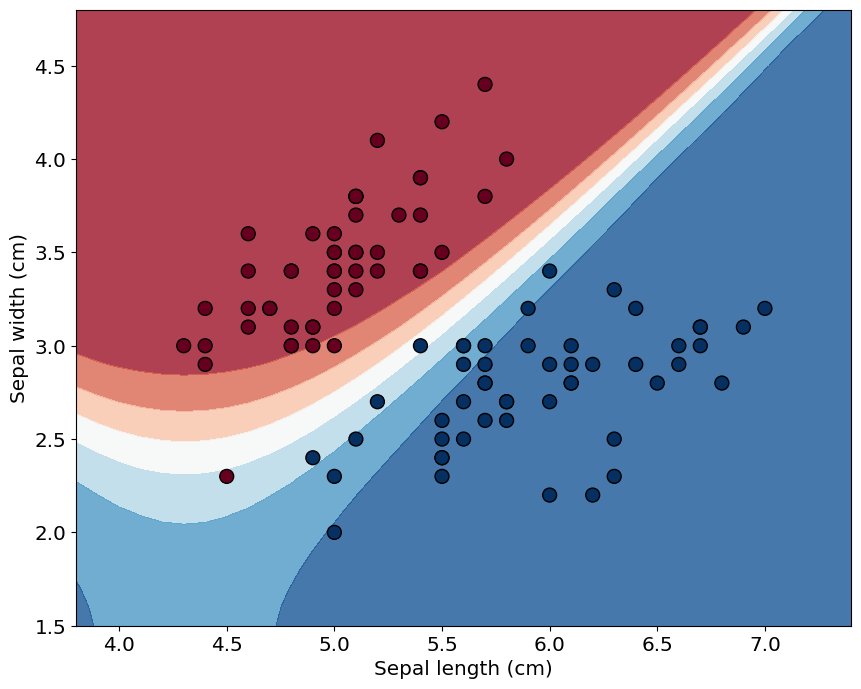

In [121]:
# Разделяющая поверхность
X = np.array(X)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [88]:
print(X_train)

[[5.7 2.8]
 [6.3 2.5]
 [5.7 2.6]
 [5.7 2.8]
 [6.9 3.1]
 [5.4 3.4]
 [4.6 3.4]
 [5.  3. ]
 [6.  3.4]
 [4.8 3.4]
 [5.1 3.4]
 [5.4 3.9]
 [5.5 2.4]
 [4.9 2.4]
 [6.6 3. ]
 [6.  2.7]
 [6.7 3. ]
 [5.6 2.7]
 [5.8 2.7]
 [6.5 2.8]
 [5.5 2.4]
 [5.2 3.4]
 [4.9 3.1]
 [5.  3.5]
 [6.7 3.1]
 [5.5 2.5]
 [5.4 3.9]
 [5.9 3.2]
 [5.5 3.5]
 [4.7 3.2]
 [5.6 3. ]
 [5.  3.6]
 [5.  3.4]
 [5.5 4.2]
 [5.6 2.9]
 [5.1 3.5]
 [6.  2.2]
 [4.5 2.3]
 [5.7 3. ]
 [6.1 2.8]
 [4.4 3.2]
 [5.6 2.5]
 [6.7 3.1]
 [5.1 2.5]
 [4.8 3.4]
 [6.2 2.2]
 [5.1 3.8]
 [5.7 4.4]
 [6.3 2.3]
 [6.4 2.9]
 [4.8 3. ]
 [5.1 3.7]
 [5.  3.4]
 [5.1 3.3]
 [5.3 3.7]
 [4.9 3. ]
 [5.8 2.7]
 [5.  3.3]
 [5.5 2.3]
 [6.4 3.2]
 [5.  2.3]
 [5.4 3.7]
 [4.8 3.1]
 [5.4 3.4]
 [5.7 2.9]
 [4.9 3.6]
 [5.5 2.6]
 [4.4 3. ]
 [6.6 2.9]
 [5.1 3.8]
 [5.2 2.7]
 [5.8 4. ]
 [5.1 3.5]
 [4.4 2.9]
 [6.3 3.3]]


In [109]:
output_data = [list(np.append(x,y)) for x, y in zip(X_test, y_pred)]
output_data

[[5.9, 3.0, 1.0],
 [5.0, 2.0, 1.0],
 [7.0, 3.2, 1.0],
 [5.7, 3.8, 0.0],
 [4.6, 3.1, 0.0],
 [6.8, 2.8, 1.0],
 [5.8, 2.6, 1.0],
 [5.2, 3.5, 0.0],
 [4.7, 3.2, 0.0],
 [6.0, 2.9, 1.0],
 [4.3, 3.0, 0.0],
 [6.2, 2.9, 1.0],
 [5.4, 3.0, 1.0],
 [4.8, 3.0, 0.0],
 [6.1, 3.0, 1.0],
 [5.2, 4.1, 0.0],
 [5.1, 3.8, 0.0],
 [5.0, 3.2, 0.0],
 [5.6, 3.0, 1.0],
 [4.6, 3.6, 0.0],
 [4.9, 3.1, 0.0],
 [4.6, 3.2, 0.0],
 [6.1, 2.8, 1.0],
 [6.1, 2.9, 1.0],
 [5.0, 3.5, 0.0]]

In [82]:
print(X_test)

[[5.9 3. ]
 [5.  2. ]
 [7.  3.2]
 [5.7 3.8]
 [4.6 3.1]
 [6.8 2.8]
 [5.8 2.6]
 [5.2 3.5]
 [4.7 3.2]
 [6.  2.9]
 [4.3 3. ]
 [6.2 2.9]
 [5.4 3. ]
 [4.8 3. ]
 [6.1 3. ]
 [5.2 4.1]
 [5.1 3.8]
 [5.  3.2]
 [5.6 3. ]
 [4.6 3.6]
 [4.9 3.1]
 [4.6 3.2]
 [6.1 2.8]
 [6.1 2.9]
 [5.  3.5]]


In [110]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)
cursor = cnxn.cursor()
cursor.executemany("INSERT INTO Output ([sepal length (cm)], [sepal width (cm)], [predicted class]) values (?, ?, ?)", output_data)
cnxn.commit()
cursor.close()
cnxn.close()

In [72]:
gnb.theta_

array([[5.04324324, 3.44054054],
       [5.91578947, 2.74736842]])

accuracy score: 1.0


<AxesSubplot: >

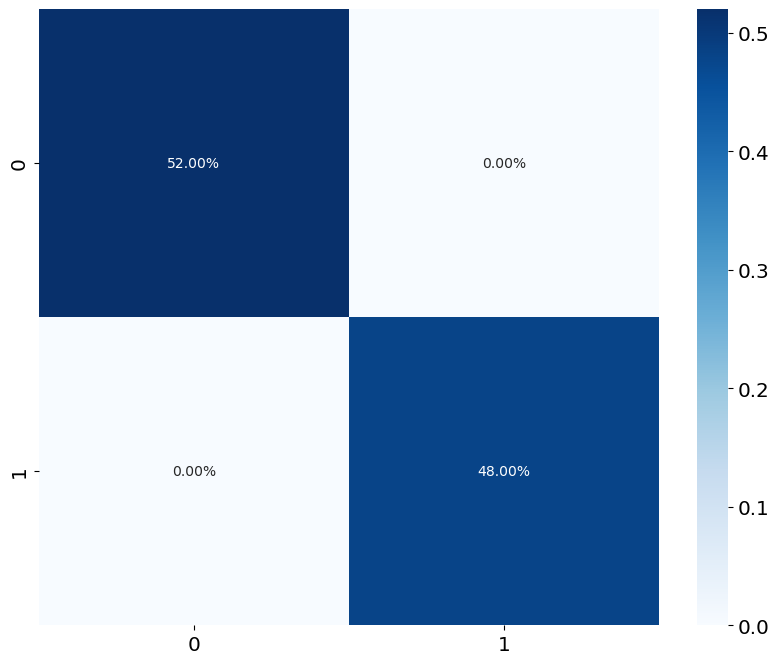

In [124]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

y_pred = y_pred_proba > .5

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
cf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True,
            fmt='.2%', cmap='Blues')

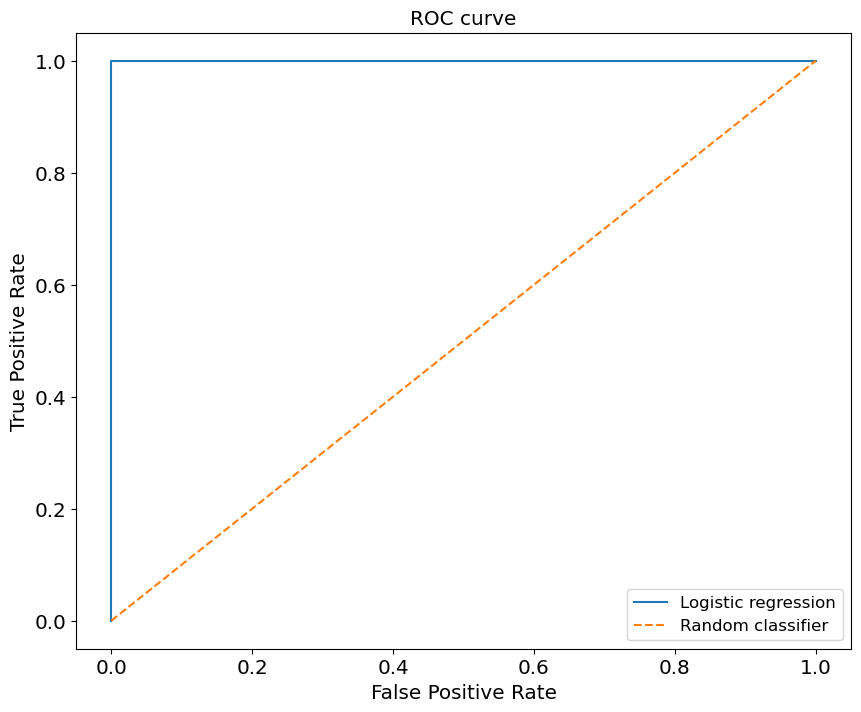

In [125]:
ns_proba = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
#create ROC curve
plt.plot(fpr,tpr, label='Logistic regression')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()